# 第4章 拡散方程式

## 4.4 2次元問題ーポテンシャル方程式を例にー

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 初期化

In [2]:
nmax = 400

M = 0.1
alpha2 = 1 - M ** 2
Uinf = 0.1

dx = dy = 0.05

# xs, xe = -5.0, 6.0
# ys, ye = 0.0, 5.0
xs, xe = -1.0, 2.0
ys, ye = 0.0, 1.0
x_le, x_te = 0.0, 1.0

jmax = int((xe - xs) / dx) + 1
kmax = int((ye - ys) / dy) + 1

j_le = int((x_le - xs) / dx)
j_te = int((x_te - xs) / dx) + 1

x = np.linspace(xs, xe, jmax)
y = np.linspace(ys, ye, kmax)

phi = np.zeros([jmax, kmax])
u = np.zeros([jmax, kmax])
v = np.zeros([jmax, kmax])

dydx = np.array([ 0.4 * (1.0 - 2.0 * x[j]) if j_le <= j < j_te else 0.0 for j in range(jmax)])

X, Y = np.meshgrid(x, y) # 可視化用

## メイン

In [3]:
residual = np.zeros(nmax)
for n in range(nmax):
    phiold = phi.copy()

    # 境界条件
    phi[0, :] = 0.0
    phi[jmax-1, :] = 0.0
    phi[:, kmax-1] = 0.0
        
    for j in range(jmax):
        phi[j, 0] = phi[j, 1] - dydx[j] * dy

    # Gaus Seidel法
    for k in range(1, kmax - 1):
        for j in range(1, jmax - 1):
            phi[j, k] = 1.0 / (2.0 * alpha2 + 2.0) * \
                (alpha2 * (phi[j-1, k] + phi[j+1, k]) + phi[j, k-1] + phi[j, k+1])
    
    residual[n]= np.sqrt(((phi-phiold) ** 2).sum() / (jmax * kmax))

In [4]:
for j in range(1, jmax - 1):
    u[j, :] = Uinf * (1.0 + (phi[j + 1, :] - phi[j - 1, :]) / (2 * dx))
u[0,:] = Uinf * (1.0 + (phi[1, :] - phi[0, :]) / dx)
u[-1,:] = Uinf * (1.0 + (phi[-1, :] - phi[-2, :]) / dx)
    
for k in range(1, kmax - 1):
    v[:, k] = Uinf * (phi[:, k + 1] - phi[:, k - 1]) / (2 * dy)
v[:,0] = Uinf * (phi[:, 1] - phi[:, 0]) / dy
v[:,-1] = Uinf * (phi[:, -1] - phi[:, -2]) / dy
    
va = np.sqrt(u ** 2 + v ** 2)

## 残差

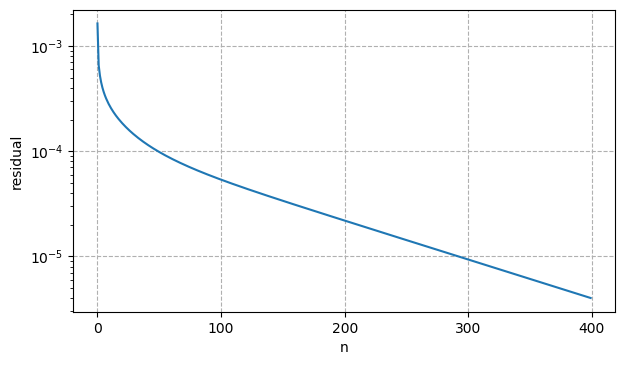

In [5]:
fig, ax1 = plt.subplots(figsize=(7,4), dpi=100) # グラフのサイズ
plt.rcParams["font.size"] = 22 # グラフの文字サイズ
cnt = plt.plot(range(nmax), residual)
plt.xlabel('n')
plt.ylabel('residual')
plt.yscale("log")
plt.grid(b=True, linestyle = '--')
plt.show()

## 可視化

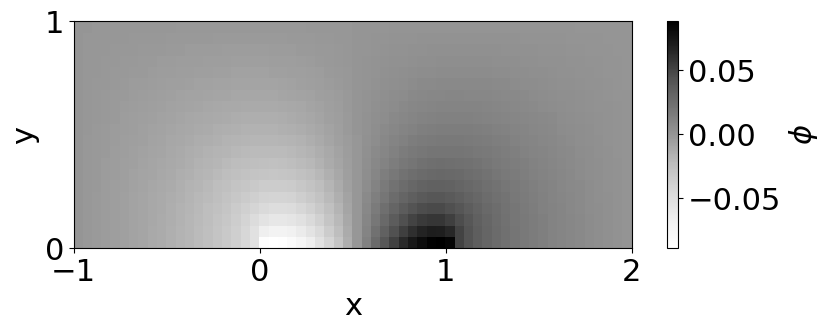

In [6]:
fig, ax1 = plt.subplots(figsize=(9,3), dpi=100) # グラフのサイズ
plt.rcParams["font.size"] = 22 # グラフの文字サイズ
# cnt = plt.pcolormesh(X,Y,phi.transpose(1,0), cmap="Greys", vmin = -0.22, vmax = 0.22)
cnt = plt.pcolormesh(X,Y,phi.transpose(1,0), cmap="Greys")
cb = fig.colorbar(cnt, ax=ax1)
cb.set_label('$\phi$')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks([xs,0,1,xe])
plt.yticks([ys, ye])
plt.show()

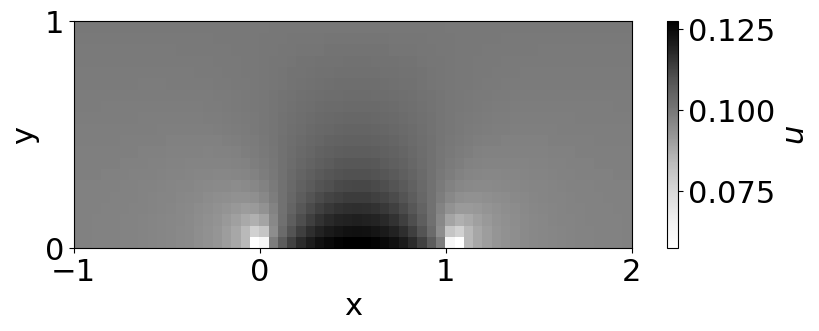

In [7]:
fig, ax1 = plt.subplots(figsize=(9,3), dpi=100) # グラフのサイズ
plt.rcParams["font.size"] = 22 # グラフの文字サイズ
cnt = plt.pcolormesh(X,Y,u.transpose(1,0), cmap="Greys")
cb = fig.colorbar(cnt, ax=ax1)
cb.set_label('$u$')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks([xs,0,1,xe])
plt.yticks([ys, ye])
plt.show()

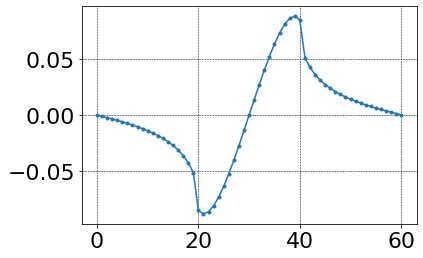

In [8]:
plt.plot(phi[:,0], marker=".")
plt.grid(color='black', linestyle='dashed', linewidth=0.5)

(-0.03998476706773327, 0.03998662229118127)

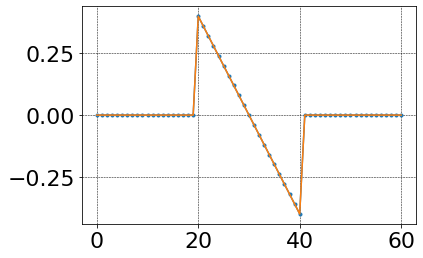

In [9]:
plt.plot(v[:,0] / Uinf, marker=".")
plt.plot(dydx)
plt.grid(color='black', linestyle='dashed', linewidth=0.5)
np.min(v[:,0]), np.max(v[:,0])

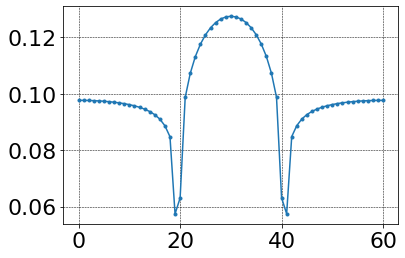

In [10]:
plt.plot(u[:,0], marker = '.')
np.min(u[:,0]), np.max(u[:,0])
plt.grid(color='black', linestyle='dashed', linewidth=0.5)

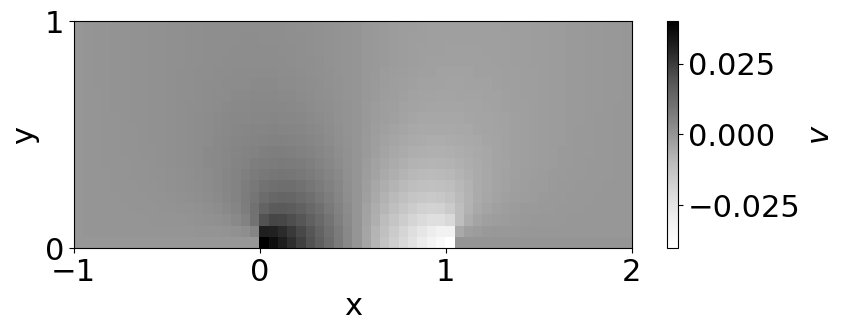

In [11]:
fig, ax1 = plt.subplots(figsize=(9,3), dpi=100) # グラフのサイズ
plt.rcParams["font.size"] = 22 # グラフの文字サイズ
cnt = plt.pcolormesh(X,Y,v.transpose(1,0), cmap="Greys")
cb = fig.colorbar(cnt, ax=ax1)
cb.set_label('$v$')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks([xs,0,1,xe])
plt.yticks([ys, ye])
plt.show()

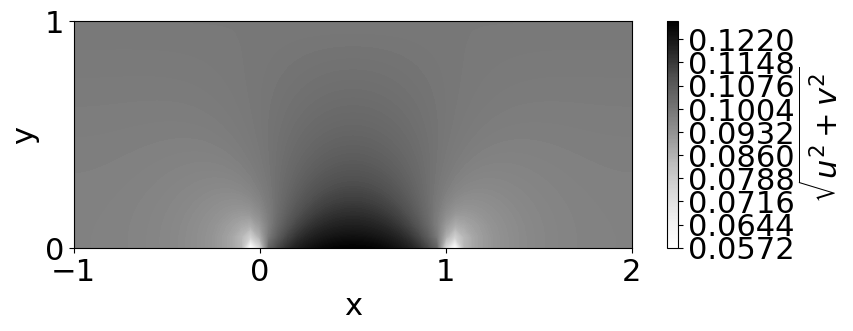

In [12]:
fig, ax1 = plt.subplots(figsize=(9,3), dpi=100) # グラフのサイズ
plt.rcParams["font.size"] = 22 # グラフの文字サイズ
cnt = plt.contourf(X,Y,va.transpose(1,0), cmap="Greys", levels = 200)
cb = fig.colorbar(cnt, ax=ax1)
cb.set_label('$\sqrt{u^2+v^2}$')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks([xs,0,1,xe])
plt.yticks([ys, ye])
plt.show()

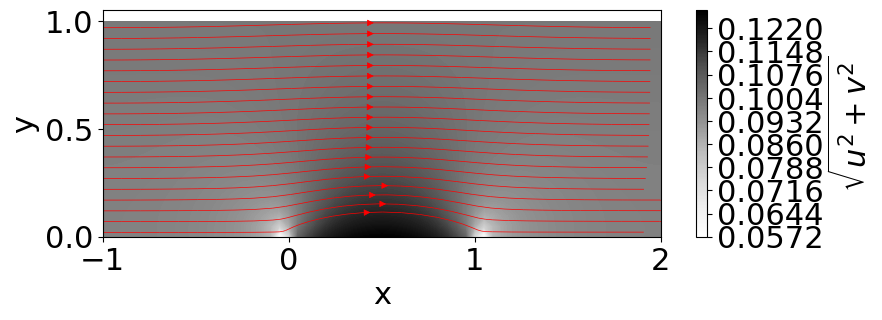

In [13]:
fig, ax1 = plt.subplots(figsize=(9,3), dpi=100) # グラフのサイズ
plt.rcParams["font.size"] = 22 # グラフの文字サイズ
cnt = plt.contourf(X,Y,va.transpose(1,0), cmap="Greys", levels=200)
cb = fig.colorbar(cnt, ax=ax1)
cb.set_label('$\sqrt{u^2+v^2}$')

sty = np.arange(0.02, ye, 0.05)
stx = np.full(len(sty), -1.0)
startpoints = np.array([stx, sty]).transpose(1,0)
plt.streamplot(X,Y,u.transpose(1,0), v.transpose(1,0), color = 'red', start_points=startpoints, linewidth = 0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.xticks([xs,0,1,xe])
plt.show()